In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
import statsmodels.graphics.tsaplots as sgt

In [ ]:
#Input data
df1 = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/saved_data.csv")

df1

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,2023-04-16,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1.866594e+06,495223185.0,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,9023.50,4137.64,33885.31,28493.47
1,2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1.839875e+06,631025193.0,...,2090.59,96.66,0.088890,0.51930,2002.2,25.460,9023.50,4137.64,33885.31,28493.47
2,2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1.759535e+06,559166432.0,...,2099.98,96.34,0.088707,0.52269,2002.2,25.460,9023.50,4137.64,33885.31,28493.47
3,2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1.812113e+06,567094231.0,...,2012.11,94.19,0.087344,0.51244,2041.3,25.925,9058.50,4146.22,34030.34,28156.97
4,2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1.933496e+06,635037442.0,...,1916.58,92.02,0.083398,0.50473,2010.9,25.458,8916.50,4091.95,33647.22,28082.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,2010-07-24,0.1,0.1,0.1,0.1,0.50,959.0,1.820000e+02,1.519540e+03,1148772.0,...,0.00,0.00,0.000000,0.00000,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4650,2010-07-23,0.1,0.1,0.1,0.1,2.40,655.0,1.820000e+02,5.309330e+02,412004.0,...,0.00,0.00,0.000000,0.00000,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4651,2010-07-22,0.1,0.1,0.1,0.1,2.16,594.0,1.820000e+02,5.724432e+02,403000.0,...,0.00,0.00,0.000000,0.00000,1195.6,18.120,7002.75,1093.67,10322.30,9220.88
4652,2010-07-21,0.1,0.1,0.1,0.1,0.58,784.0,1.820000e+02,6.038213e+02,499964.0,...,0.00,0.00,0.000000,0.00000,1191.8,17.803,0.00,1069.59,10120.53,9278.83


In [ ]:
df2=df1[0:1000]
df = df2.iloc[::-1]
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
999,2020-07-21,9387.3,9162.3,9426.9,9155.1,458.99,927506.0,1.734590e+13,1292411.712,491378058.0,...,245.53,43.785,0.003300,0.19947,1843.9,21.557,6534.5,3257.30,26840.40,22884.22
998,2020-07-22,9513.7,9387.4,9523.1,9296.0,386.00,1017627.0,1.734590e+13,1260827.708,571307064.0,...,263.28,44.983,0.003289,0.20356,1865.1,23.144,6486.0,3276.02,27005.84,22751.61
997,2020-07-23,9599.6,9513.6,9646.5,9451.1,425.66,977856.0,1.734590e+13,1291887.757,543267007.0,...,275.34,44.939,0.003298,0.20851,1890.0,22.988,6544.5,3235.66,26652.33,22751.61
996,2020-07-24,9546.4,9599.2,9626.2,9480.5,359.16,1083981.0,1.734590e+13,1314932.379,643237571.0,...,279.33,44.100,0.003215,0.20401,1897.5,22.850,6415.0,3215.63,26469.89,22751.61
995,2020-07-25,9704.1,9546.7,9729.3,9536.2,306.29,972156.0,1.734590e+13,1366096.035,559366641.0,...,305.32,49.153,0.003252,0.21463,1897.5,22.850,6415.0,3215.63,26469.89,22751.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1933495.919,635037442.0,...,1916.58,92.020,0.083398,0.50473,2010.9,25.458,8916.5,4091.95,33647.22,28082.70
3,2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1812112.549,567094231.0,...,2012.11,94.190,0.087344,0.51244,2041.3,25.925,9058.5,4146.22,34030.34,28156.97
2,2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1759535.436,559166432.0,...,2099.98,96.340,0.088707,0.52269,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
1,2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1839875.354,631025193.0,...,2090.59,96.660,0.088890,0.51930,2002.2,25.460,9023.5,4137.64,33885.31,28493.47


In [ ]:
df=df['BTC_close']


In [ ]:
df

999     9387.3
998     9513.7
997     9599.6
996     9546.4
995     9704.1
        ...   
4      29886.4
3      30387.4
2      30472.5
1      30299.6
0      30310.3
Name: BTC_close, Length: 1000, dtype: float64

In [ ]:
df.describe

<bound method NDFrame.describe of 999     9387.3
998     9513.7
997     9599.6
996     9546.4
995     9704.1
        ...   
4      29886.4
3      30387.4
2      30472.5
1      30299.6
0      30310.3
Name: BTC_close, Length: 1000, dtype: float64>

In [ ]:
n=int(len(df)*0.8)
train=df[:n]
test=df[n:]

In [ ]:
print(len(train),len(test))

800 200


In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.dropna())
print(f"ADF Statistic :{result[0]}")
print(f"p-value :{result[1]}")

ADF Statistic :-1.820789884577885
p-value :0.37019002918195154


P>0.05 ==> The series is not stationary

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

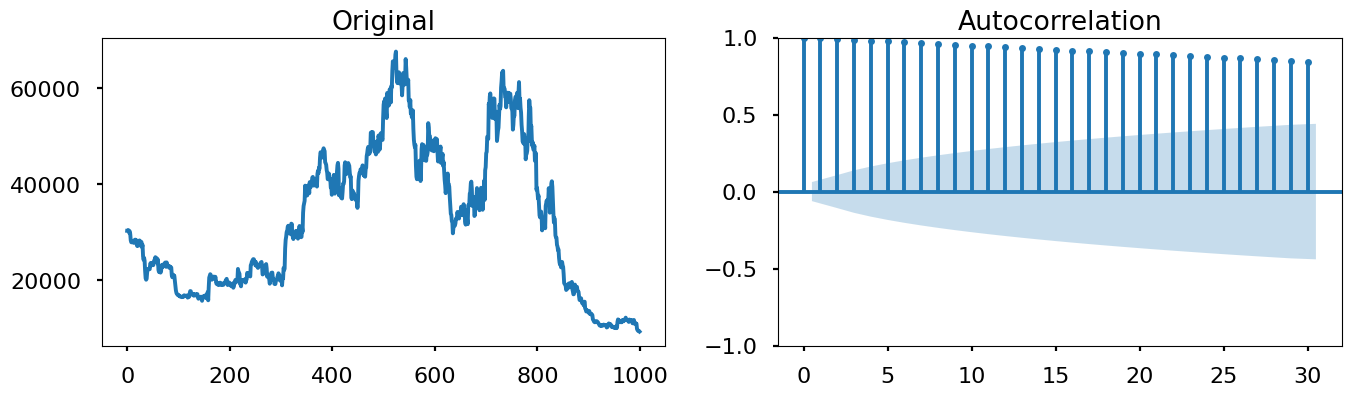

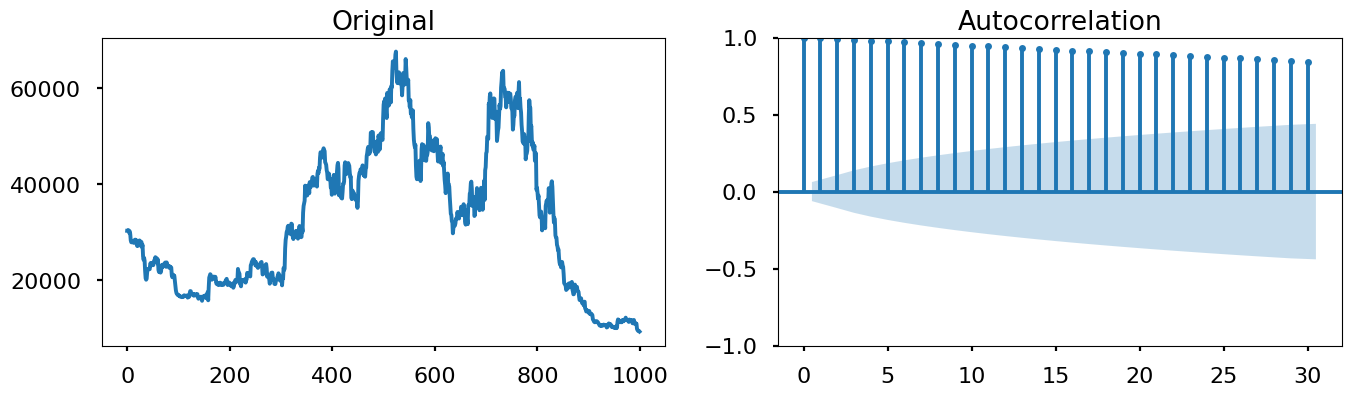

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df)
ax1.set_title("Original")
plot_acf(df,ax=ax2)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.4 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(df,test="adf")

1

d=1

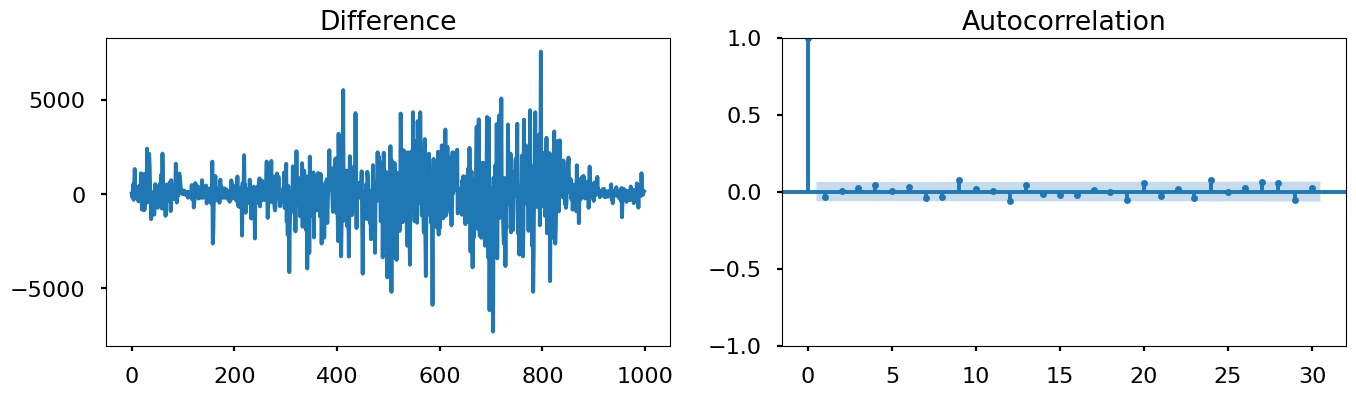

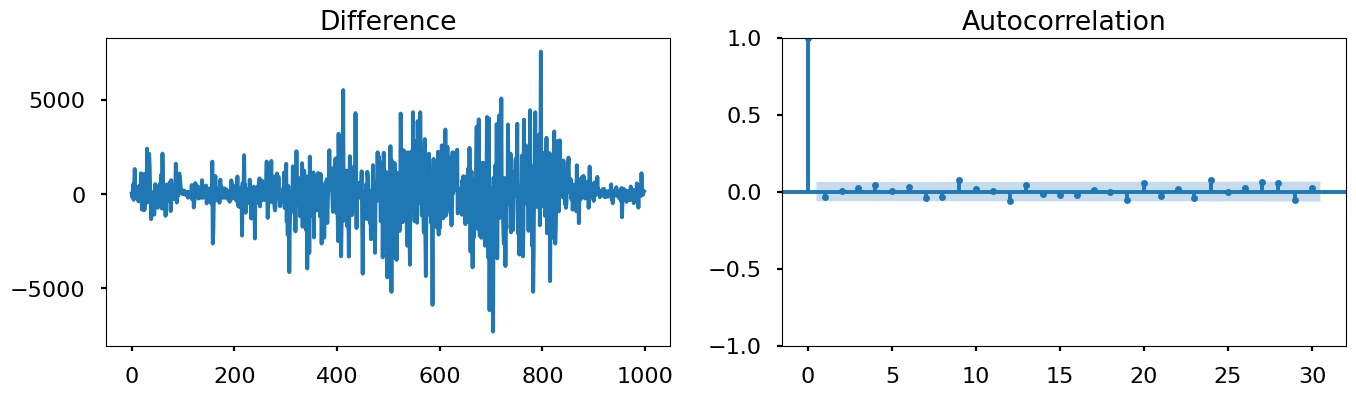

In [ ]:
diff=df.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference")
plot_acf(diff,ax=ax2)

p=9

q=4

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.arima.ARIMA(train, order=(9, 1, 4))
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              BTC_close   No. Observations:                  800
Model:                 ARIMA(9, 1, 4)   Log Likelihood               -6957.502
Date:                Thu, 15 Jun 2023   AIC                          13943.004
Time:                        11:32:19   BIC                          14008.571
Sample:                             0   HQIC                         13968.194
                                - 800                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0197      0.490     -0.040      0.968      -0.979       0.940
ar.L2         -0.0164      0.411     -0.040      0.968      -0.821       0.788
ar.L3         -0.2060      0.341     -0.605      0.545      -0.874       0.462
ar.L4          0.2229      0.376      0.593      0.553      -0.514       0.960
ar.L5          0.0163      0.042      0.392      0.695      -0.065       0.098
ar.L6          0.0316      0.043      0.736      0.462      -0.052       0.116
ar.L7         -0.0413      0.042     -0.988      0.323      -0.123       0.041
ar.L8         -0.0460      0.032     -1.437      0.151      -0.109       0.017
ar.L9          0.0870      0.044      1.957      0.050      -0.000       0.174
ma.L1         -0.0165      0.490     -0.034      0.973      -0.977       0.944
ma.L2          0.0240      0.402      0.060      0.952      -0.764       0.812
ma.L3          0.2320      0.334      0.694      0.488      -0.423       0.887
ma.L4         -0.1899      0.380     -0.500      0.617      -0.935       0.555
sigma2      2.177e+06   7.08e+04     30.767      0.000    2.04e+06    2.32e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               371.10
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_pred = model.fittedvalues
train_pred


999        0.000000
998     9152.353549
997     9514.567224
996     9744.185741
995     9824.327290
           ...     
204    19189.302575
203    19013.894358
202    18850.640153
201    19171.779162
200    19115.784501
Length: 800, dtype: float64

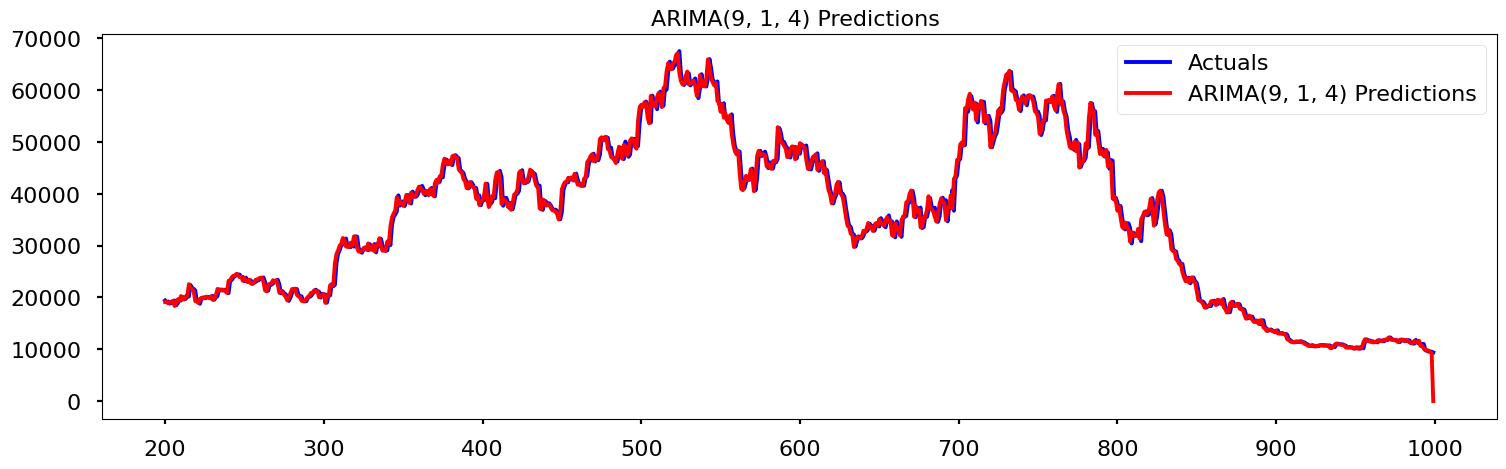

In [ ]:
plt.rcParams["figure.figsize"] = 18, 5

# Defining the subplots
fig, ax = plt.subplots(1, 1)

# Actuals vs Predictions for ARIMA(9, 1, 4)
ax.plot(train, color = "blue", label = "Actuals")

ax.plot(train_pred, color = "red", label = "ARIMA(9, 1, 4) Predictions")
ax.set_title(f"ARIMA(9, 1, 4) Predictions ", size = 16)
plt.legend()
# Displaying the plots
plt.show()

In [ ]:
count = 0
for i in range(1,len(train)):
    if (train.values[i] - train.values[i-1]) * (train_pred.values[i] - train_pred.values[i-1]) > 0:
        count += 1
print(count/(len(train)-1))

0.4755944931163955


In [ ]:
start_index = len(train)
end_index = len(train)+len(test)-1
test_pred = model.predict(start=start_index, end=end_index)
test_pred

199    19324.987381
198    19275.540248
197    19366.389382
196    19423.958823
195    19369.254037
           ...     
4      19376.120034
3      19376.120034
2      19376.120034
1      19376.120034
0      19376.120034
Name: predicted_mean, Length: 200, dtype: float64

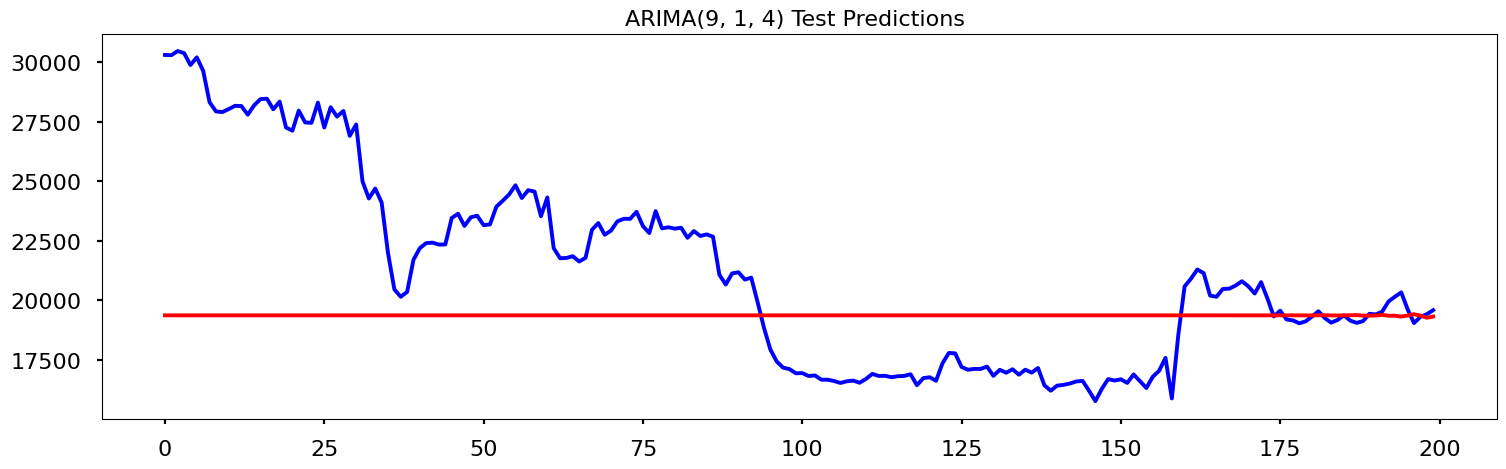

In [ ]:
plt.rcParams["figure.figsize"] = 18, 5
fig, ax = plt.subplots(1, 1)
ax.plot(test, color = "blue", label = "Actuals")
ax.plot(test_pred, color = "red", label = "ARIMA(9, 1, 4) Predictions")
ax.set_title(f"ARIMA(9, 1, 4) Test Predictions ", size = 16)

# Displaying the plots
plt.show()

In [ ]:
count = 0
for i in range(1,len(test)):
    if (test.values[i] - test.values[i-1]) * (test_pred.values[i] -test.values[i-1]) > 0:
        count += 1
print(count/(len(test)-1))

0.5376884422110553
